imports

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

Setup

In [5]:
con = sqlite3.connect('../nokia.db')
df = pd.read_sql_query('SELECT * FROM Makkah_5g', con)
con.close()

<h1>Classification<h1>

<h2>LogisticRegression<h2>

In [ ]:
# Prepare your data (remove or impute missing values first)
# Assume 'Quality_Category' is a categorical target variable
df['Quality_Category'] = pd.cut(df['Serving RS Info-Serving RSRP (d Bm)'], bins=[-100, -90, -80, 0], labels=['Poor', 'Moderate', 'Good'])

X = df[['Latitude', 'Longitude', 'RSRP (d Bm)-Dominant RSRP (d Bm)', 'Serving RS Info-NR Best SS-RSRP', 'Serving RS Info-NR Best SS-SINR']].dropna()
y = df['Quality_Category'].dropna()

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define and fit the model
model = LogisticRegression(multi_class='ovr', max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

<h2>Random Forest<h2>

In [ ]:
# Prepare your data (remove or impute missing values first)
# Assume 'Quality_Category' is a categorical target variable
df['Quality_Category'] = pd.cut(df['Serving RS Info-Serving RSRP (d Bm)'], bins=[-100, -90, -80, 0], labels=['Poor', 'Moderate', 'Good'])

X = df[['Latitude', 'Longitude', 'RSRP (d Bm)-Dominant RSRP (d Bm)', 'Serving RS Info-NR Best SS-RSRP', 'Serving RS Info-NR Best SS-SINR']].dropna()
y = df['Quality_Category'].dropna()

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define and fit the model
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Make predictions
y_pred = rf_clf.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

<h1>Regression<h1>

In [26]:
# Prepare your data (remove or impute missing values first)
X = df[['Latitude', 'Longitude', 'RSRP (d Bm)-Dominant RSRP (d Bm) ', 'Serving RS Info-NR Best SS-RSRP', 'Serving RS Info-NR Best SS-SINR']].dropna()
y = df['Data Throughput-RLC DL Throughput (kbps)'].dropna()

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print('Linear Regression Mean Squared Error:', mse)

ValueError: Found input variables with inconsistent numbers of samples: [14831, 20227]

In [ ]:

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'Random Forest Regression': RandomForestRegressor(n_estimators=100, random_state=42)
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f'{name} Mean Squared Error:', mse)


In [33]:


# Step 1: Load the dataset
data = df

data = data.dropna(subset=['RSRP (d Bm)-Dominant RSRP (d Bm) '])  # Drop rows where RSRP is missing
data = data.fillna(0)  # Fill other missing values with 0 (or use other strategies)

features = [
    'Latitude', 'Longitude', 'Serving Channel Info-DL EARFCN',
    'Serving Cell Info-Serving PCI', 'Serving RS Info-NR Best SS-RSRP',
    'Serving RS Info-NR Best SS-SINR', 'Data Throughput-RLC DL Throughput (kbps)',
    'Serving RS Info-Serving RSRP (dBm)', 'Serving RS Info-Serving RS CINR (dB)',
    'Serving RS Info-Serving RSRQ (dB)', 'Data Throughput-NR PDCP downlink throughput (Mbps)',
    '5G NR-NR Best SS-RSRP', '5G NR-NR PDCP downlink throughput (Mbps)',
    '5G NR-NR Best SS-SINR'
]

X = data[features]
y = data['RSRP (d Bm)-Dominant RSRP (d Bm) ']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Hyperparameter Tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)

# Step 4: Evaluate the best model
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Best Hyperparameters: {grid_search.best_params_}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R2): {r2}')

# Optional: Feature importance
importances = best_rf.feature_importances_
feature_importance = pd.Series(importances, index=features).sort_values(ascending=False)
print(feature_importance)


KeyError: "['Serving RS Info-Serving RSRP (dBm)', 'Serving RS Info-Serving RS CINR (dB)', 'Serving RS Info-Serving RSRQ (dB)'] not in index"

<h2>polynomial regression<h2>

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

poly = PolynomialFeatures(degree=2, include_bias=False)
model = make_pipeline(poly, LinearRegression())
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Polynomial Regression Mean Squared Error:', mse)

<h2>SVR<h2>

In [35]:
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('SVR Mean Squared Error:', mse)


NameError: name 'X_train' is not defined

<h1>Clustering<h1>

<h2>Kmeans:<h2`>

[[ 2.14312533e+01  3.98579227e+01  2.87392921e+04 -8.35407909e+01
  -8.60332323e+01  1.36449144e+01]
 [ 2.14540614e+01  3.98439196e+01  2.50393640e+05 -7.87899170e+01
  -8.45566927e+01  1.89327064e+01]
 [ 2.14386362e+01  3.98552057e+01  9.23622617e+04 -8.10448236e+01
  -8.60544433e+01  1.48559692e+01]
 [ 2.14603930e+01  3.98366962e+01  3.76539147e+05 -7.46276554e+01
  -8.30678107e+01  2.07409322e+01]
 [ 2.14436047e+01  3.98417774e+01  1.63484825e+05 -7.94576845e+01
  -8.51685103e+01  1.69751062e+01]]


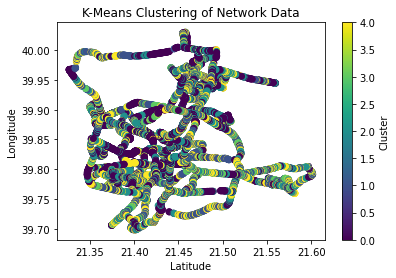

In [16]:
# Prepare your data (remove or impute missing values first)
data = df[['Latitude', 'Longitude', 'Data Throughput-RLC DL Throughput (kbps)', 'RSRP (d Bm)-Dominant RSRP (d Bm) ', 'Serving RS Info-NR Best SS-RSRP', 'Serving RS Info-NR Best SS-SINR']].dropna()

# Define the number of clusters
kmeans = KMeans(n_clusters=5, random_state=42)

# Fit the model
kmeans.fit(data)

# Get cluster labels
data['Cluster'] = kmeans.labels_

# Print the cluster centers
print(kmeans.cluster_centers_)

# Visualize clusters
plt.scatter(data['Latitude'], data['Longitude'], c=data['Cluster'], cmap='viridis')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('K-Means Clustering of Network Data')
plt.colorbar(label='Cluster')
plt.show()


<h2>DBSCAN<h2>

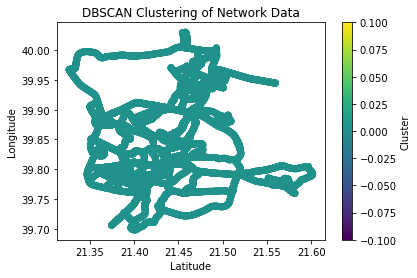

In [29]:

# Prepare your data (remove or impute missing values first)
data = df[['Latitude', 'Longitude', 'Data Throughput-RLC DL Throughput (kbps)', 'RSRP (d Bm)-Dominant RSRP (d Bm) ', 'Serving RS Info-NR Best SS-RSRP', 'Serving RS Info-NR Best SS-SINR']].dropna()

# Define the DBSCAN model
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Fit the model
clusters = dbscan.fit_predict(data)

# Add cluster labels to the data
data['Cluster'] = clusters

# Visualize clusters
plt.scatter(data['Latitude'], data['Longitude'], c=data['Cluster'], cmap='viridis')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('DBSCAN Clustering of Network Data')
plt.colorbar(label='Cluster')
plt.show()
